<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-first-run" data-toc-modified-id="Simple-first-run-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple first run</a></span></li></ul></div>

In [546]:
import numpy as np
import matplotlib.pyplot as plt

## Simple first run

1. Iniatilize NxN grid
2. Compute the initial energy $E$
3. Flip random spin and compute $\Delta E$
4. Accept or reject based on criteria
5. Continue to 3

In [601]:
def adjacent_indices_torus(idx, N):
    i, j = idx
    return [
        ((i+1)%N, j),
        ((i-1), j),
        (i, (j+1)%N),
        (i, (j-1)),
    ]

def ising_energy(grid, J, mu):
    N = len(grid)
    E = 0
    # This is not efficient, but is clear to read
    for i in range(N):
        for j in range(N):
            adj_ = adjacent_indices_torus((i,j), N)
            E += -J*grid[i,j]*sum(grid[ix] for ix in adj_)
            E += -mu*grid[i, j]
    return E

#@profile
def simulate_ising(grid, beta, J, mu, steps=int(1e5), E=None):
    if E is None:
        E = ising_energy(grid, J, mu)

    energies = []
    randix = (np.random.randint(0, N, size=(steps,2)))
    for n in range(steps):
        energies.append(E)
        i,j = randix[n]
        x = grid[i,j]
        adj_ = adjacent_indices_torus((i,j), N)
        dE = J*x*sum(grid[ix] for ix in adj_) + mu*x
        dE *= 2

        if dE < 0:
            grid[i, j] = - x
            E = E + dE
            continue

        accept_p = np.exp(-beta*dE)
        if accept_p>np.random.rand():
            grid[i, j] = - x
            E = E + dE
    energies.append(E)
    return grid, energies

adjacent_indices_torus((1, 20), 20)

[(2, 20), (0, 20), (1, 1), (1, 19)]

In [602]:
# Insight from using full energy
np.seterr(over='raise')

{'divide': 'warn', 'over': 'raise', 'under': 'ignore', 'invalid': 'warn'}

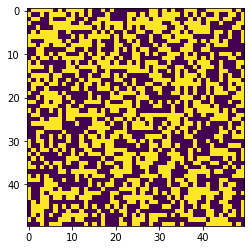

In [603]:
N = 50
grid = np.random.randint(low=0, high=2, size=(N, N))
plt.imshow(grid)
# Rescale to +-1
grid = -1 + 2*grid

In [610]:
J = 0.5
mu = 0

temps = np.linspace(0.5, 3, 20)
eneg_tm = []
mag_tm = []
for T in temps:
    beta = 1/T
    grid = np.random.randint(low=0, high=2, size=(N, N))
    #grid = np.ones((N,N))
    grid = -1 + 2*grid
    grid, energies = simulate_ising(grid, beta, J, mu, steps=N**2*500)
    
    E = []
    M = []
    print('measure')
    for i in range(N**2*100):
        grid, energies = simulate_ising(grid, beta, J, mu, steps=1, E=energies[-1])
        E.append( energies[-1] )
        M.append(np.mean(grid))
        
    print('done measure')
    eneg_tm.append(E)
    mag_tm.append(M)
    

measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure
measure
done measure


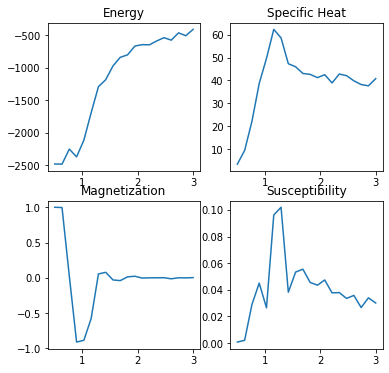

In [611]:
fig, axs = plt.subplots(2,2, figsize=(6,6))

[ax.set_title(t) for ax, t in zip(sum(map(list, axs),[]),
                              ['Energy','Specific Heat', 'Magnetization', 'Susceptibility'])]

axs[0,0].plot(temps, list(map(np.mean, eneg_tm)))
axs[0,1].plot(temps, list(map(np.std, eneg_tm)))
axs[1,0].plot(temps, list(map(np.mean, mag_tm)))
axs[1,1].plot(temps, list(map(np.std, mag_tm)))


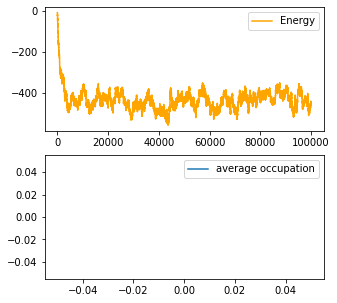

In [554]:
fig, axs = plt.subplots(2,1, figsize=(5,5))
plt.plot(averages, label='average occupation') 
plt.legend()
plt.sca(axs[0])
plt.plot(energies, label='Energy', color='orange') 
plt.legend()

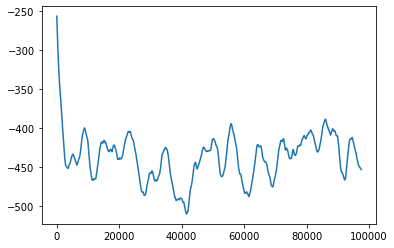

In [559]:
plt.plot(np.convolve(energies, np.ones((N**2,))/N**2, mode='valid'))

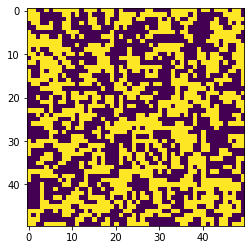

In [440]:
plt.imshow(grid)